In [73]:
%load_ext autoreload
%autoreload 2

from agents.DotGobblers.config import PROJ_ROOT
from pathlib import Path
from GameAnalysis import GameAnalysis
import matplotlib.pyplot as plt

#JSON files
# balanced (= baseline with 1 offensive & 1 defensive agent) VS X
balancedVSbalanced_json = Path(PROJ_ROOT, "www", "contest_balancedVSbalanced", "scores", "match_0.json")
balancedVSdefensive_json = Path(PROJ_ROOT, "www", "contest_balancedVSdefensive", "scores", "match_0.json")
balancedVSoffensive_json = Path(PROJ_ROOT, "www", "contest_balancedVSoffensive", "scores", "match_0.json")
# offensive (= 2 offensive agents) VS X
offensiveVSoffensive_json = Path(PROJ_ROOT, "www", "contest_offensiveVSoffensive", "scores", "match_0.json")
offensiveVSdefensive_json = Path(PROJ_ROOT, "www", "contest_offensiveVSdefensive", "scores", "match_0.json")
#defensive vs X
defensiveVSdefensive_json = Path(PROJ_ROOT, "www", "contest_defensiveVSdefensive", "scores", "match_0.json")

# GameAnalysis objects
# balanced VS X
balancedVSbalanced_exp = GameAnalysis(balancedVSbalanced_json)
balancedVSdefensive_exp = GameAnalysis(balancedVSdefensive_json)
balancedVSoffensive_exp = GameAnalysis(balancedVSoffensive_json)
# offensive VS X
offensiveVSoffensive_exp = GameAnalysis(offensiveVSoffensive_json)
offensiveVSdefensive_exp = GameAnalysis(offensiveVSdefensive_json)
# defensive VS X
defensiveVSdefensive_exp = GameAnalysis(defensiveVSdefensive_json)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


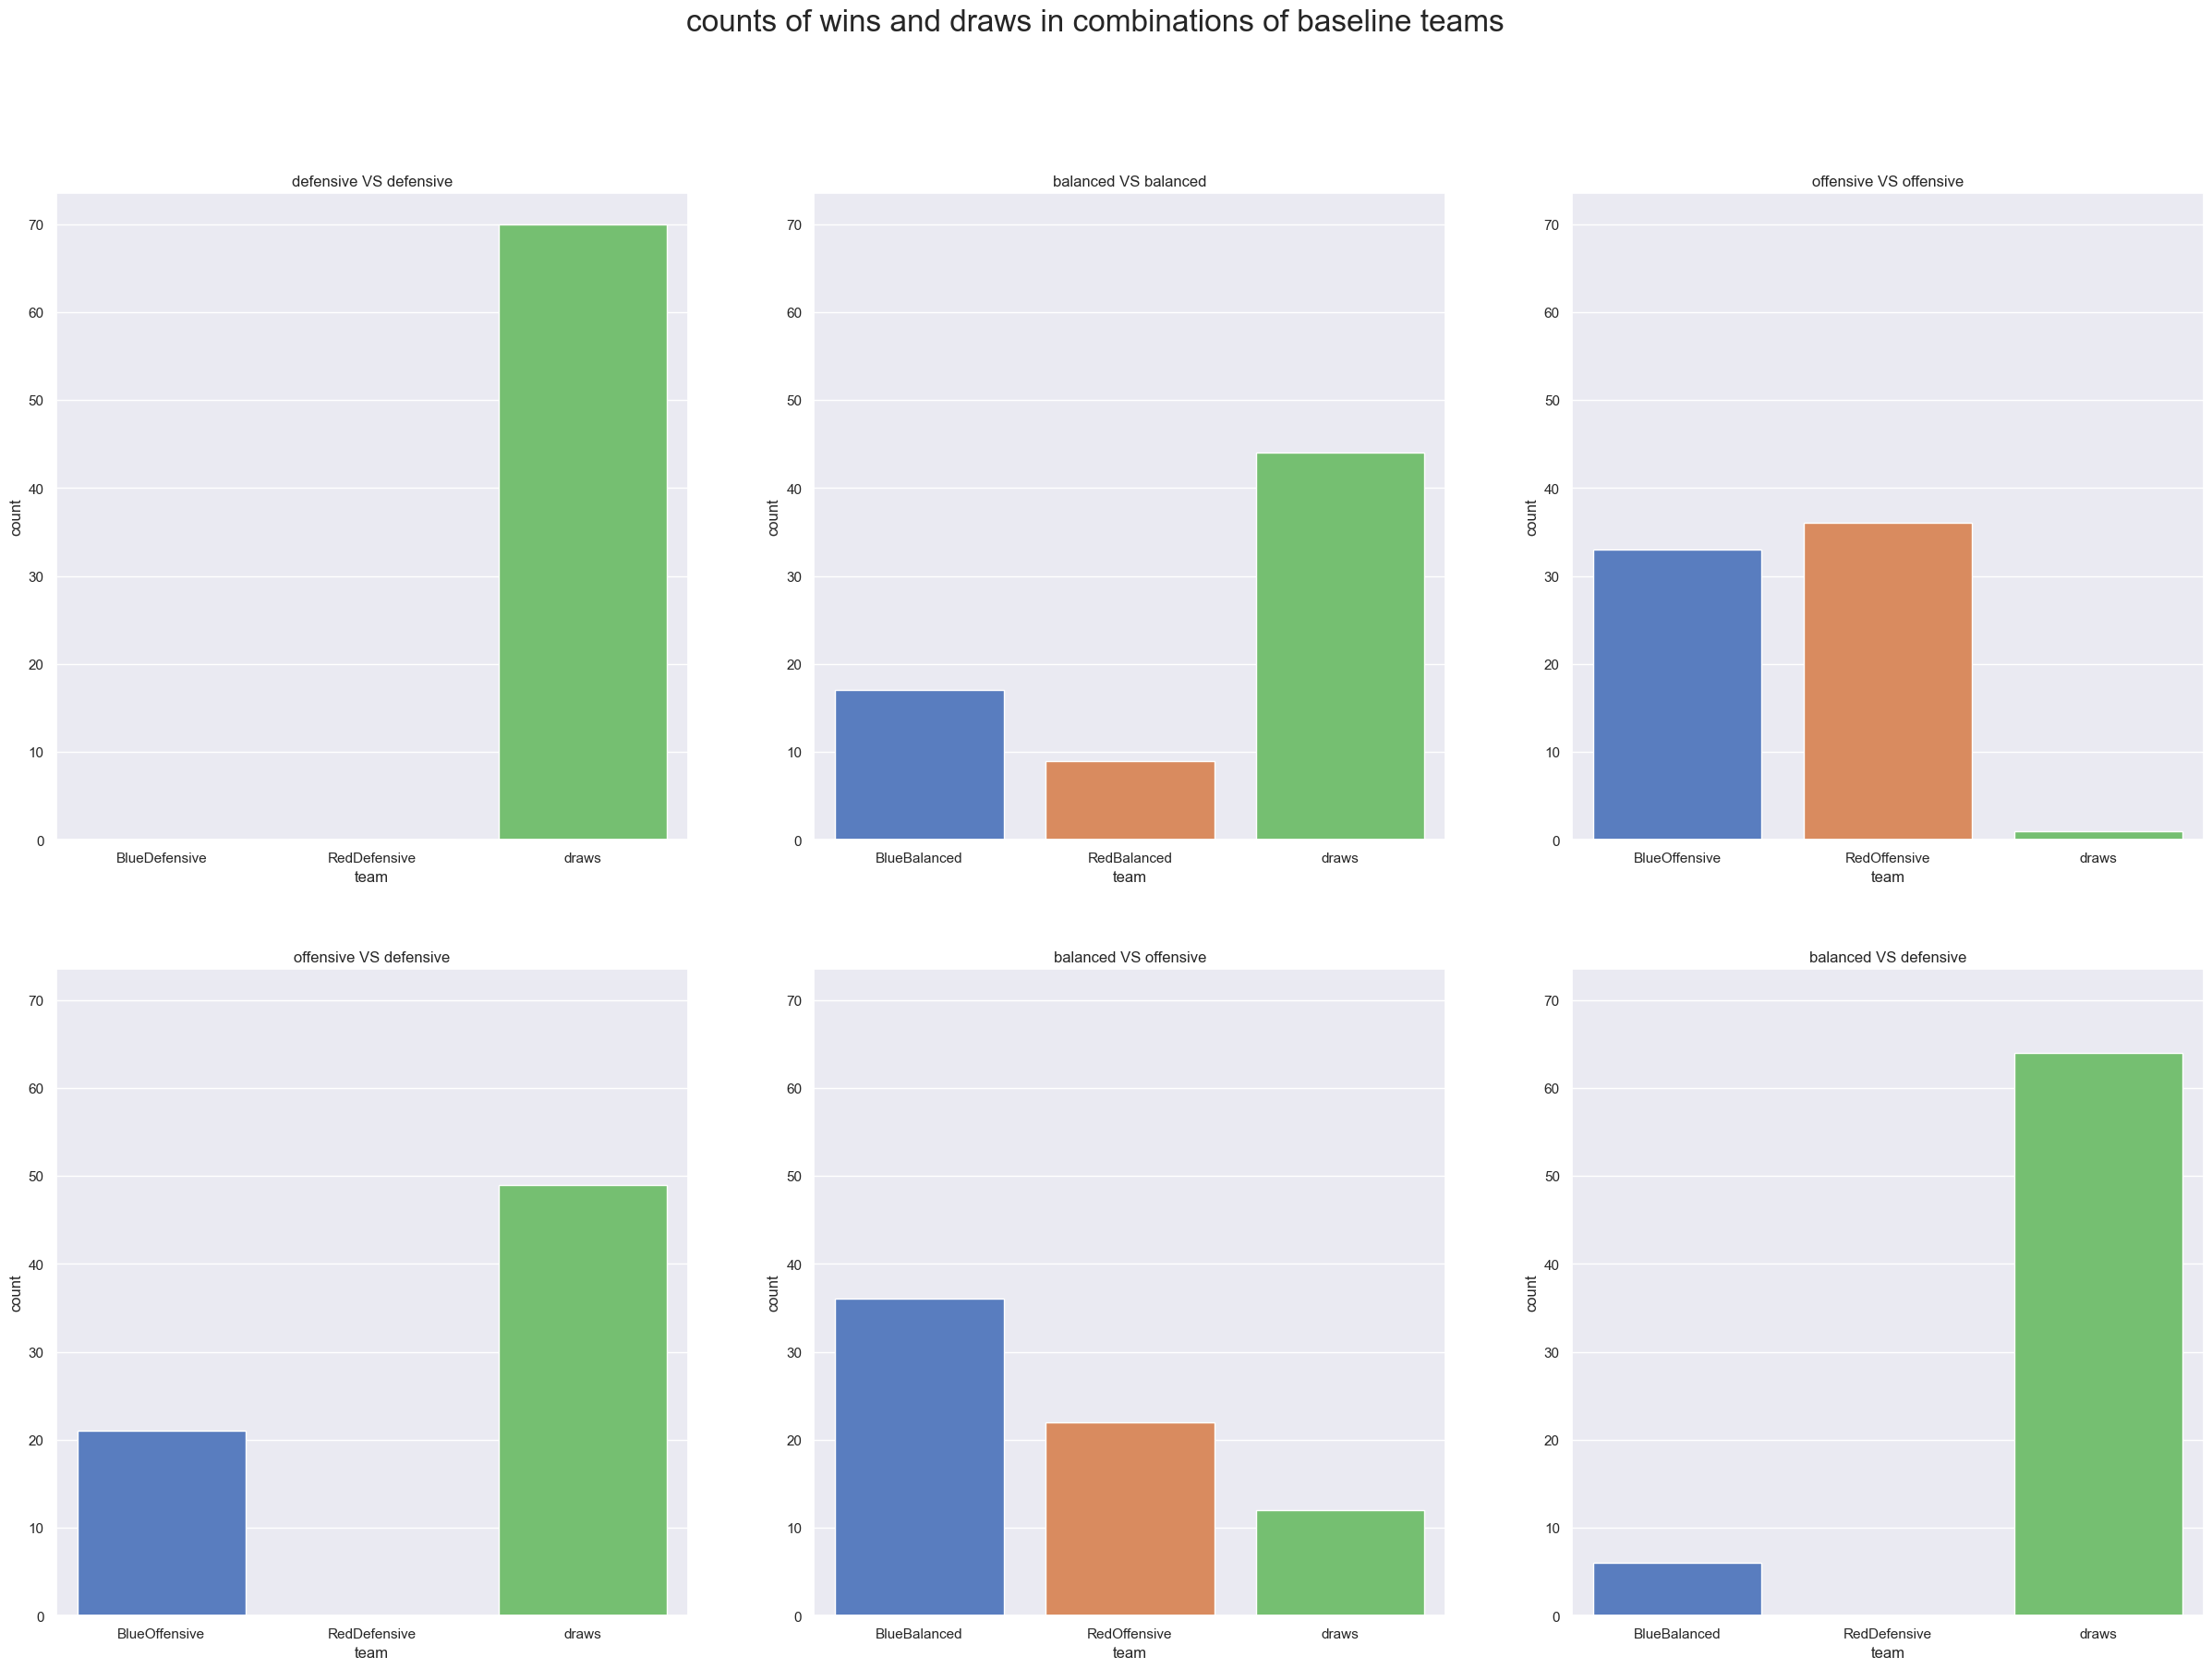

In [89]:
experiments = [balancedVSdefensive_exp, balancedVSoffensive_exp, offensiveVSdefensive_exp, offensiveVSoffensive_exp,balancedVSbalanced_exp, defensiveVSdefensive_exp]

rows = 2
cols = 3
experiment_num = len(experiments) - 1

agg = plt.figure(figsize=(30, 20))
gs = agg.add_gridspec(rows, cols)

agg.suptitle('counts of wins and draws in combinations of baseline teams', fontsize=24)

for row in range(rows):
    for col in range(cols):
        ax = agg.add_subplot(gs[row, col], sharey=ax1)
        experiments[experiment_num].generate_winplot()
        experiment_num -= 1

## Resultaten van matched opposing teams tournaments
- Gekeken naar gelijke tegenstanders (offensive vs offensive (oVo), balanced vs balanced(bVb), defensive vs defensive (dVd)) valt op dat de speldynamieken van elkaar verschillen.
    - Defensive versus defensive levert, zoals verwacht, vooral gelijkspel op aangezien de agents beiden geen punten binnenhalen
    - bij offensive vs offensive zien we een tegengesteld effect: zeer weinig games eindigen in gelijkspel, en zoals te verwachten, winnen beiden offensive agents ongeveer een gelijk aantal games.
    - Bij balanced vs balanced is de dynamiek wat complexer. Iets meer dan de helft van de spellen eindigen in gelijkspel. Uit de overige spellen behaalde 1 team consistent meer wins dan de het ander team, ondanks dat beiden teams dezelfde strategie hanteren.

Ondanks de 'naïviteit' van de baseline agents, roepen de resultaten wat vragen op over de dynamieken van het spel. Belangrijk in het achterhoofd te houden is dat veel parameters met elkaar gematched zijn. Gematchte teams volgen een identiek algoritme en strategie. Resulterende dynamieken zijn generaliseerbaar en zijn onafhankelijk van de layout (door gebruik van random layouts voor elke game, en de symmetrische aard van een layout, met andere worden, hun terein is "equally challenging").

De resultaten van dVd zijn het meest intuïtief te verklaren omdat deffensieve agents geen punten kunnen binnenhalen (cummulatieve score voor beide teams is 0 over alle games).

Interessanter zijn de bVb en oVo toernooien. oVo games tonen een omgekeerde speldynamiek tot over dVd games: Een verwaarloosbaar aantal gelijkspel uitkomsten waarbij in de meerderheid van de tijd er wel een team is dat wint. Ondanks dat er wel altijd een winaar is, winnen ze in de limiet ongeveer even vaak, ook dit is intuïtief verklaarbaar met dat alle agents "even sterk" zijn en dezelfde uitdaging in terein trotseren.

Een interessanter fenomeen om nader te bekijken speelt zich af in de bVb toernooien. Hier zien we dat het een soort van mix is tussen dVd en oVo, er is zowel een beduidend aantal gelijkspel uitkomsten alsook wins en losses. Opvallend is wel dat de helft van de games gelijkspel zijn, en uit de overige uitkomsten is er een team die bijna de helft meer "wins" heeft dan de ander. Merk op dat dit haaks staat met wat we in oVo zagen waar offensieve agenten vrij "matched" presteren. De offensieve agent in de balanced team is de voornaamste "puntenwinnaar", en de puntenwinaars van beiden teams zijn in principe "even sterk". Er is mogelijk aanwijzing dat er emergente effecten optreden door een teamsamenstelling met verschillende type agents. Het is misschien nuttig om het volgende dieper te bekijken:
    - wat gebeurt er typisch bij de "draw games"
    - wat gebeurt er typisch bij de "win" games. Wat maakt dat er een team is die consistent wint?

In plaats van de volledige replay te bekijken van de 70 spellen, kunnen we uit de `<exp>.games_dataframe`de relevante games filteren en hun layout manueel runnen. Ervanuitgaande dat de agents geen random choises maken in hun acties zouden de games deterministisch moeten zijn en hetzelfde resultaat moeten opleveren.


## Resultaten van mixed opposing teams tournaments
In deze tournamenten is het effect van de defensieve agenten iets meer duidelijk. Ondanks dat defensieve agenten geen puntenwinaars zijn die een game gaan doen winnen, lijken ze zeker wel een meerwaarde te hebben in het spel. In de oVd toernooi zien we dat de defensive team 70% van de games heeft kunnen verdedigen. Het contrast is nog groter bij een gebalanceerd team, waar het defense team meer dan 80% games heeft kunnen verdedigen. Dit is intuïtief verklaarbaar met dat en gebalanceerd team 1 offensive agent minder heeft. Merk wel op, in een gebalanceerd team zijn er 50% minder offensieve agents, maar ze winnen slechts 25% van het aantal games in vergeleken met het offensief (versus defensief) toernooi. Bovenstaande resultaten tonen niet enkel de protectieve factor van een defensief team aan, maar ook dat een offensief team sterker bestand is tegen een overwegend defensief team.

Tenslotte, lijkt het dat een gebalanceerd team overwegend wint van een offensief team. Inderdaad, een gebalanceerd team haalt bijna het dubbel van de wins en aantal punten tot over een offensief team. Het offensief heeft ook vaker verloren dan dat het tot een gelijkspel heeft kunnen komen. Wel kan het interessant zijn om nader te bekijken wanneer het spel tot gelijkstand is gekomen: komt een spel tot gelijkstand omdat een defensive agent uit het gebalanceerd team adequaat aanvallen van een offensieve team kan weerstaan? Of zijn er zaken uit het gedrag van een offensief team die de "power-combo" van een gebalanceerd team in die spellen kan evenaren. Of waren dit gewoon spellen waar beiden teams slecht presteerden. Een slimmer offensief team heeft het potentieel om de baseline gebalanceerde teams te kunnen overwinnen.

Ontbrekende maar nuttige zaken voor toekomstige analyses:
- de win rate vergelijken tot over het punten percentage. Bijvoorbeeld in de balanced vs offensive is de winrate voor het gebalanceerd team 51%, maar het punten percentage 57%. Afhankelijk van het toernooi is de ene metriek interessanter boven de andere. Het verschil tussen beiden scores komt voornamelijk door de draw-games. Toernooien met weinig tot geen draws vertonene gelijkaardige win-rates en points_percentages.

In [93]:
balancedVSoffensive_exp.team_stats_dataframe

,points_percentage,points,wins,draws,losses,errors,sum_score,team
BlueBalanced,57.142857,120.0,36.0,12.0,22.0,0.0,1005.0,BlueBalanced
RedOffensive,37.142857,78.0,22.0,12.0,36.0,0.0,621.0,RedOffensive


## conclusies
- Er treden mogelijk emergente effecten op waarbij het geheel niet zomaar de som der delen is: gebalanceerde teams kunnen elkaar nog altijd outmatchen ondanks dat veel van hun interne en omgevingsparameters gelijk zijn.
- Ondanks dat een agent de punten inwint, is het niet zo dat het aantal offensieve agenten verdubbelen en verdubbeling in het aantal overwinningen betekent. Het toevoegen van een extra offensieve agent gaf 75% meer overwiningen tegen een defensief team, maar een vermindering van het aantal overwinningen van 50% tot over een gebalanceerd team. De kanttekening is dat veel van de spellen ook tot een gelijkspel hebben geleid.
- Ondanks dat een gebalanceerd team beter lijkt te presteren dan een offensief team, kan het met bovenstaand puntje interessant blijven om slimmere offensieve teams te blijven testen.
- Een heel sterke verdediging toont gelijkaardige co-operatieve effecten als een heel sterke aanval. Voor de defense games geldt het volgende: een offensive agent toevoegen geeft een increase in wins van 75%. Maar het aantal draws (en dus succesvolle verdedigingen van het defense team) daalt slechts met een (grof bekeken op de chart) 20% procent.
- Tradeoff van offensieve en gebalanceerde teams moet verder worden onderzocht. Eventueel ook met hybride agenten die contextueel de voordelen van beiden kunnen overnemen.